Load the dataset

In [2]:
import pandas as pd

# Load the CSV file with the actual filename
df = pd.read_csv("test (2).csv")

# Preview first rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Handling missing values

In [3]:
# Check how many missing values per column
df.isnull().sum()
# Fill categorical columns with mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill numeric column with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

/tmp/ipython-input-2877248388.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-2877248388.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Exploratory Visualizations

In [5]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


Add a Simulated Loan_Status Column

In [6]:
import numpy as np

# Add a simulated Loan_Status column
# 70% of the loans approved ('Y'), 30% rejected ('N')
df['Loan_Status'] = np.random.choice(['Y', 'N'], size=len(df), p=[0.7, 0.3])

# Verify it worked
print(df['Loan_Status'].value_counts())

Loan_Status
Y    246
N    121
Name: count, dtype: int64


Run EDA Visualization

/tmp/ipython-input-1232663496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='Blues')


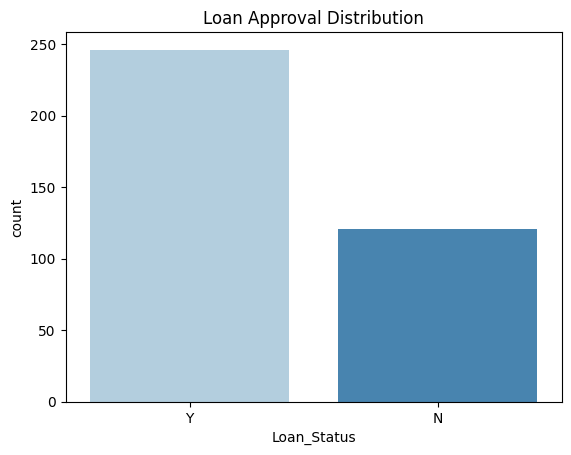

In [9]:
###Loan Aproval Amount
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Loan_Status', palette='Blues')
plt.title("Loan Approval Distribution")
plt.show()

/tmp/ipython-input-1755791589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome', palette='Purples')


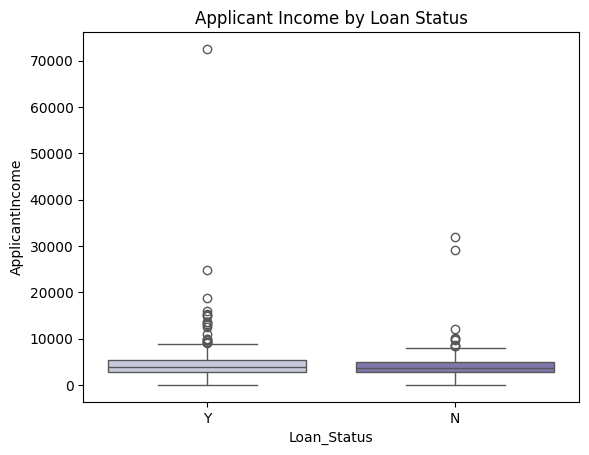

In [10]:
###Applicant Income vs Loan Status
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome', palette='Purples')
plt.title("Applicant Income by Loan Status")
plt.show()

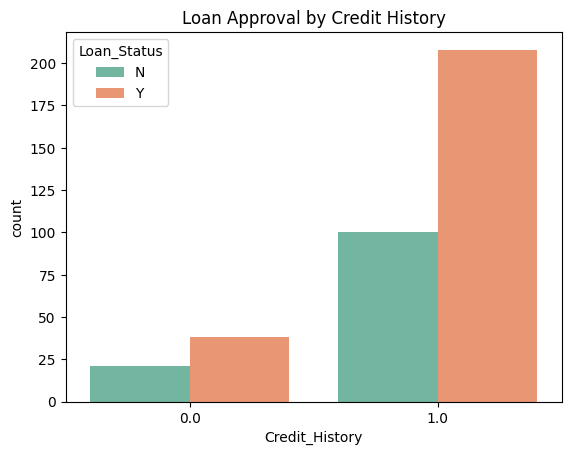

In [11]:
###Credit History Vs Loan Status
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='Set2')
plt.title("Loan Approval by Credit History")
plt.show()

In [14]:
###Cleaned Data Set
from google.colab import files

# Save the cleaned DataFrame to a CSV
df.to_csv("loan_data_cleaned_with_status.csv", index=False)

# Download the file
files.download("loan_data_cleaned_with_status.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>